<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Desafios-DNC/blob/main/Desafio7elton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
!pip install numpy

In [ ]:
!pip install kmodes

In [ ]:
!pip install ydata-profiling

In [ ]:
! pip install sidetable

In [ ]:
import numpy as np
import pandas as pd

# Data vizualização
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

# Machine learning
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # Agrupando dados categóricos
from kmodes.kprototypes import KPrototypes  # Agrupando dados mistos

# Finalidades didáticas
import string
from ipywidgets import interact
from ydata_profiling import ProfileReport

# Análise exploratória dos dados (Data Understanding)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data7.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535874 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535874 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,6035
Description,7489
Quantity,6035
InvoiceDate,6035
UnitPrice,6035
CustomerID,138727
Country,6035


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,535874.000000,535874.000000,403182.000000
mean,9.587927,4.636533,15287.687868
std,153.292222,97.302232,1714.009551
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
#ProfileReport(df)

In [ ]:
df = df.copy()

# Tratamento dos Dados (Data Preparation)

In [ ]:
# Transformando coluna Country em categoria

df['Country'] = df['Country'].astype('category')

In [ ]:
# Excluindo dados nulos
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    403182 non-null  object  
 1   StockCode    403182 non-null  object  
 2   Description  403182 non-null  object  
 3   Quantity     403182 non-null  float64 
 4   InvoiceDate  403182 non-null  object  
 5   UnitPrice    403182 non-null  float64 
 6   CustomerID   403182 non-null  float64 
 7   Country      403182 non-null  category
dtypes: category(1), float64(3), object(4)
memory usage: 25.0+ MB


In [ ]:
# Verificando preços nulos

preços_nulos = df[df['UnitPrice'].isnull()]
print(preços_nulos)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [ ]:
# Verificando quantidades nulas

quantidades_nulas = df[df['Quantity'].isnull()]
print(quantidades_nulas)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [ ]:
# Verificando se existem linhas duplicadas

df.duplicated().sum().any()

True

In [ ]:
# Dropando linhas duplicadas

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398003 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    398003 non-null  object  
 1   StockCode    398003 non-null  object  
 2   Description  398003 non-null  object  
 3   Quantity     398003 non-null  float64 
 4   InvoiceDate  398003 non-null  object  
 5   UnitPrice    398003 non-null  float64 
 6   CustomerID   398003 non-null  float64 
 7   Country      398003 non-null  category
dtypes: category(1), float64(3), object(4)
memory usage: 24.7+ MB


In [ ]:
# Corrija o tipo de dado do CustomerID
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
# Corrija o tipo de dado do Quantity
df['Quantity'] = df['Quantity'].astype(int)

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#tirar o horario do InvoiceDate, só manter a data padrao internacional

df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398003 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    398003 non-null  object  
 1   StockCode    398003 non-null  object  
 2   Description  398003 non-null  object  
 3   Quantity     398003 non-null  int64   
 4   InvoiceDate  398003 non-null  object  
 5   UnitPrice    398003 non-null  float64 
 6   CustomerID   398003 non-null  int64   
 7   Country      398003 non-null  category
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 24.7+ MB


In [ ]:
# Corrija o tipo de dado da InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398003 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    398003 non-null  object        
 1   StockCode    398003 non-null  object        
 2   Description  398003 non-null  object        
 3   Quantity     398003 non-null  int64         
 4   InvoiceDate  398003 non-null  datetime64[ns]
 5   UnitPrice    398003 non-null  float64       
 6   CustomerID   398003 non-null  int64         
 7   Country      398003 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.7+ MB


In [ ]:
# Remover letras e caracteres especiais da coluna InvoiceNo, mantendo apenas os números

df['InvoiceNo'] = df['InvoiceNo'].str.extract('(\d+)')

In [ ]:
# Converter a coluna InvoiceNo para int

df['InvoiceNo'] = df['InvoiceNo'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398003 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    398003 non-null  int64         
 1   StockCode    398003 non-null  object        
 2   Description  398003 non-null  object        
 3   Quantity     398003 non-null  int64         
 4   InvoiceDate  398003 non-null  datetime64[ns]
 5   UnitPrice    398003 non-null  float64       
 6   CustomerID   398003 non-null  int64         
 7   Country      398003 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 24.7+ MB


In [ ]:
# Verificando preços menores ou iguais a zero

preços_igual_menor = df[df['UnitPrice'] <= 0]
print(preços_igual_menor)

        InvoiceNo StockCode                          Description  Quantity  \
9302       537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576      539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089      539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068      540372     22090              PAPER BUNTING RETROSPOT        24   
47070      540372     22553               PLASTERS IN TIN SKULLS        24   
56674      541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789      543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188     547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453     548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208     548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042     550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613     553000     47566                        PARTY BUNTING

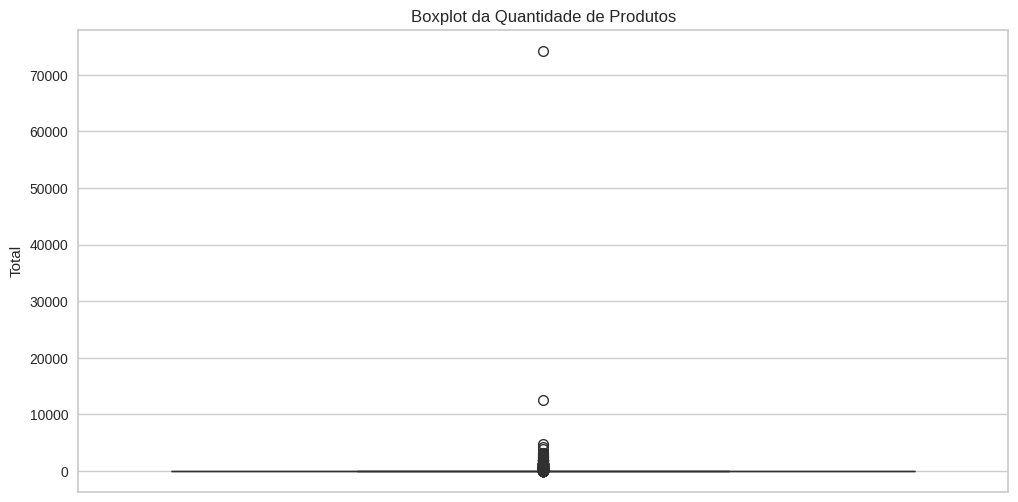

In [ ]:
# Identificando valores negativos em Quantity

df_quant = df[df['Quantity'] > 0]
plt.figure(figsize=(12, 6))
sns.boxplot(y=df_quant['Quantity'])
plt.title('Boxplot da Quantidade de Produtos')
plt.ylabel('Total')
plt.show()

<Axes: >

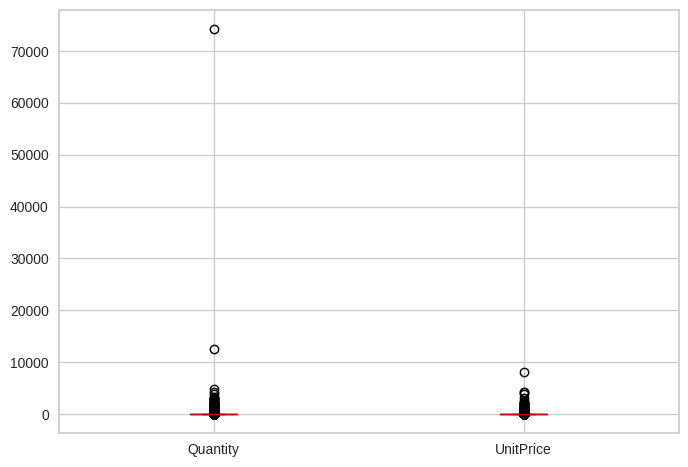

In [ ]:
df_quant[['Quantity','UnitPrice']].plot.box()

In [ ]:
df_quant.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df_quant.drop(df_quant.query('Quantity < 0').index, inplace=True)

<ipython-input-351-8c3ad5a2ec99>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_quant.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# Tratando os outliers

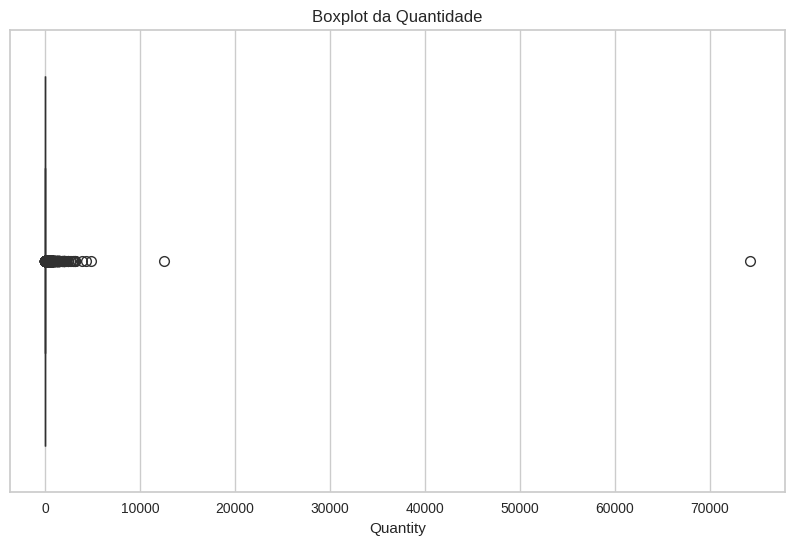

In [ ]:
# Tratando os outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_quant['Quantity'])
plt.title('Boxplot da Quantidade')
plt.show()

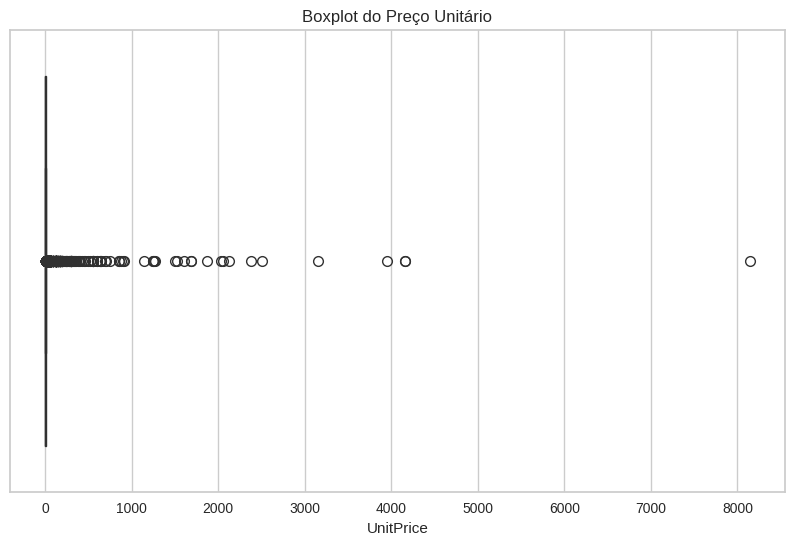

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_quant['UnitPrice'])
plt.title('Boxplot do Preço Unitário')
plt.show()

In [ ]:
# Removendo outliers extremos

df_quant = df_quant[(df_quant['Quantity'] <= 10000) & (df_quant['UnitPrice'] <= 5000)]

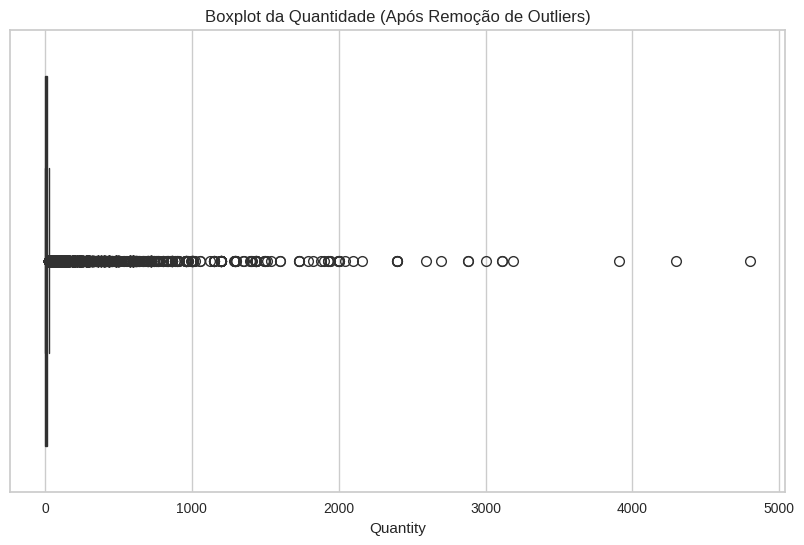

In [ ]:
# Visualizando os dados após a remoção dos outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_quant['Quantity'])
plt.title('Boxplot da Quantidade (Após Remoção de Outliers)')
plt.show()

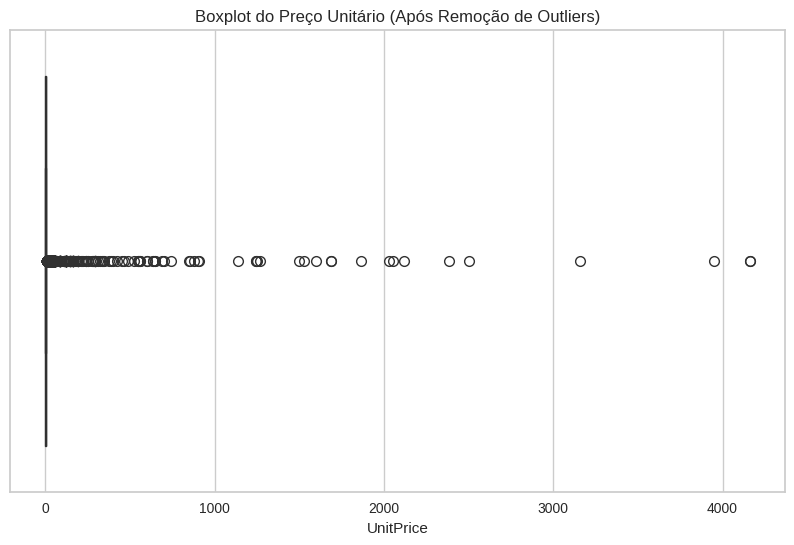

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_quant['UnitPrice'])
plt.title('Boxplot do Preço Unitário (Após Remoção de Outliers)')
plt.show()


In [ ]:
# Crie uma nova coluna 'TotalPreço' que é o produto de 'Quantity' e 'UnitPrice'

df_quant['TotalPreço'] = df_quant['Quantity'] * df_quant['UnitPrice']
df_quant

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPreço
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60


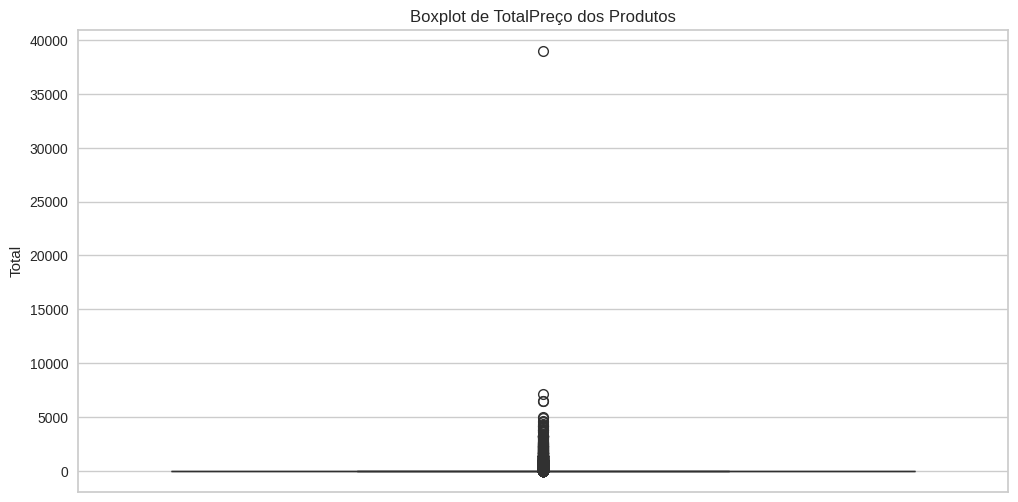

In [ ]:
# Identificando valores negativos em TotalPreço

df_quant = df_quant[df_quant['TotalPreço'] > 0]
plt.figure(figsize=(12, 6))
sns.boxplot(y=df_quant['TotalPreço'])
plt.title('Boxplot de TotalPreço dos Produtos')
plt.ylabel('Total')
plt.show()

In [ ]:
df_quant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389154 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    389154 non-null  int64         
 1   StockCode    389154 non-null  object        
 2   Description  389154 non-null  object        
 3   Quantity     389154 non-null  int64         
 4   InvoiceDate  389154 non-null  datetime64[ns]
 5   UnitPrice    389154 non-null  float64       
 6   CustomerID   389154 non-null  int64         
 7   Country      389154 non-null  category      
 8   TotalPreço   389154 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 27.1+ MB


In [ ]:
# Data de referência para cálculo da recência(última data no dataset)

data_referencia = df_quant['InvoiceDate'].max()
data_referencia

Timestamp('2011-12-09 00:00:00')

In [ ]:
# Recência: Dias desde a última compra

recencia = df_quant.groupby('CustomerID').agg({'InvoiceDate': lambda x: (data_referencia - x.max()).days}).reset_index()
recencia.columns = ['CustomerID', 'Recencia']

In [ ]:
# Frequência: Nùmero de compras

frequencia = df_quant.groupby('CustomerID').agg({'InvoiceNo': 'count'}).reset_index()
frequencia.columns = ['CustomerID', 'Frequencia']

In [ ]:
# Tiket Médio: Valor médio gasto por compra

valor_gasto = df_quant.groupby('CustomerID').agg({'TotalPreço': 'mean'}).reset_index()
valor_gasto.columns = ['CustomerID', 'Valor']

In [ ]:
# Unindo os três indicadores em um único DataFrame

rfv = recencia.merge(frequencia, on='CustomerID').merge(valor_gasto, on='CustomerID')

In [ ]:
print(rfv)

      CustomerID  Recencia  Frequencia      Valor
0          12347         2         181  23.755801
1          12348        75          31  57.975484
2          12349        18          73  24.076027
3          12350       310          17  19.670588
4          12352        36          85  29.482824
...          ...       ...         ...        ...
4330       18280       277          10  18.060000
4331       18281       180           7  11.545714
4332       18282         7          12  14.837500
4333       18283         3         721   2.837074
4334       18287        42          70  26.246857

[4335 rows x 4 columns]


In [ ]:
rfv.query('Valor>50').sort_values('Valor', ascending=False)

,CustomerID,Recencia,Frequencia,Valor
2009,15098,182,3,13305.500000
2500,15749,235,10,4453.430000
2085,15195,2,1,3861.000000
596,13135,196,1,3096.000000
4011,17846,85,1,2033.100000
...,...,...,...,...
963,13645,120,5,50.420000
565,13093,275,155,50.402000
3709,17427,71,2,50.400000
2995,16430,57,6,50.141667


In [ ]:
# Retirado cliente ID 15098, motivo compras muito fora da media
rfv.query('CustomerID==15098')

,CustomerID,Recencia,Frequencia,Valor
2009,15098,182,3,13305.5


In [ ]:
rfv = rfv.drop(rfv.query('CustomerID==15098').index)

<Axes: >

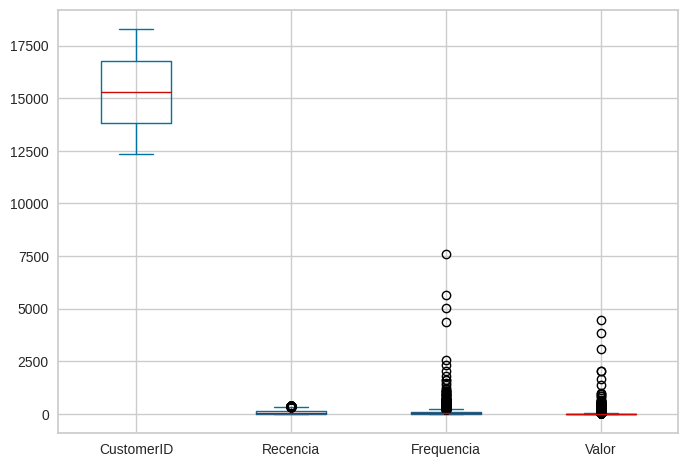

In [ ]:
rfv.plot.box()

<Axes: >

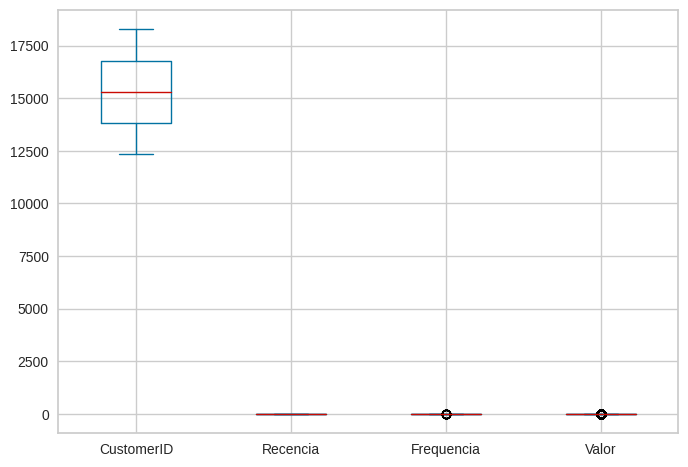

In [ ]:
# Aplicando a transformação

pt = PowerTransformer()
rfv[['Recencia', 'Frequencia', 'Valor']] = pt.fit_transform(rfv[['Recencia', 'Frequencia', 'Valor']])
rfv.plot.box()


In [ ]:
rfv

,CustomerID,Recencia,Frequencia,Valor
0,12347,-1.720246,1.193298,0.395550
1,12348,0.289245,-0.211224,1.349187
2,12349,-0.709902,0.464320,0.411322
3,12350,1.590861,-0.672678,0.168814
4,12352,-0.260225,0.585809,0.644649
...,...,...,...,...
4330,18280,1.475203,-1.066487,0.063544
4331,18281,1.052786,-1.320632,-0.511941
4332,18282,-1.222142,-0.933013,-0.184348
4333,18283,-1.582411,2.315447,-2.512851


In [ ]:
# Eleiminar a coluna CustomerID pois não será necessária
rfv_scaled = rfv.drop(columns=['CustomerID'])

In [ ]:
# Normalização dos dados no rfv
scaler_min_max = MinMaxScaler()
colunas_para_norm = ['Recencia', 'Frequencia', 'Valor']
rfv_scaled_norm = rfv_scaled.copy()
rfv_scaled_norm[colunas_para_norm] = scaler_min_max.fit_transform(rfv_scaled[colunas_para_norm])


<Axes: >

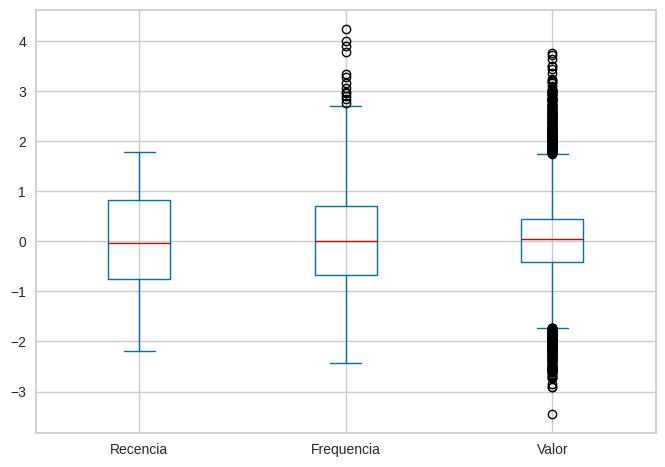

In [ ]:
rfv_scaled.plot.box()

In [ ]:
rfv_scaled.describe()

,Recencia,Frequencia,Valor
count,4.334000e+03,4.334000e+03,4334.000000
mean,-2.295246e-17,8.197309e-18,0.000000
std,1.000115e+00,1.000115e+00,1.000115
min,-2.190763e+00,-2.422899e+00,-3.450071
25%,-7.441629e-01,-6.726779e-01,-0.419624
50%,-2.411260e-02,7.469577e-03,0.039623
75%,8.322236e-01,6.976490e-01,0.449308
max,1.785954e+00,4.244567e+00,3.757034


In [ ]:
rfv_scaled_clip = rfv_scaled.apply(lambda x: x.clip(upper= x.quantile(.95)))
rfv_scaled_clip.describe()

,Recencia,Frequencia,Valor
count,4334.000000,4334.000000,4334.000000
mean,-0.005562,-0.020438,-0.028390
std,0.990763,0.957134,0.934464
min,-2.190763,-2.422899,-3.450071
25%,-0.744163,-0.672678,-0.419624
50%,-0.024113,0.007470,0.039623
75%,0.832224,0.697649,0.449308
max,1.594203,1.615627,1.764647


# Modelagem dos Dados - Clusterização

## K-Means


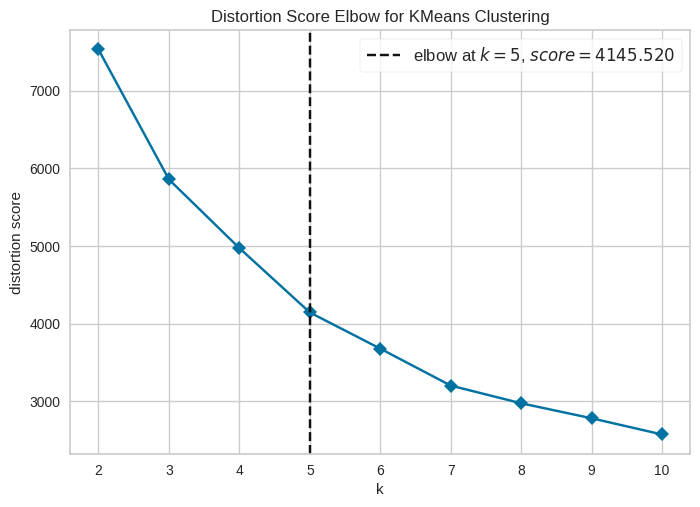

In [ ]:
# Verificando melhor K

kelbow_visualizer(KMeans(), rfv_scaled_clip, k=10, timings=False);

In [ ]:
# Criando lista de dicionarios

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = rfv_scaled_clip.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,7530.699004,0.327488,1.183834,2574.750570
3,6164.256922,0.266166,1.265309,2052.426390
4,4843.207614,0.289898,1.186736,2134.788033
5,4146.310477,0.276659,1.110888,2051.641682
6,3661.995641,0.281387,1.084139,1972.432702
7,3204.376568,0.287329,1.043897,1981.002695
8,3014.075386,0.278770,1.118393,1843.824636
9,2789.335999,0.273647,1.148538,1786.453255
10,2563.016653,0.275454,1.105579,1770.214058


In [ ]:

kmeans = KMeans(5)
kmeans_labels = kmeans.fit_predict(rfv_scaled_clip)

In [ ]:
px.scatter_3d(rfv_scaled_clip, x='Recencia', y='Frequencia', z='Valor', color=kmeans_labels.astype(str),template= 'plotly_dark')

# Hierarquia

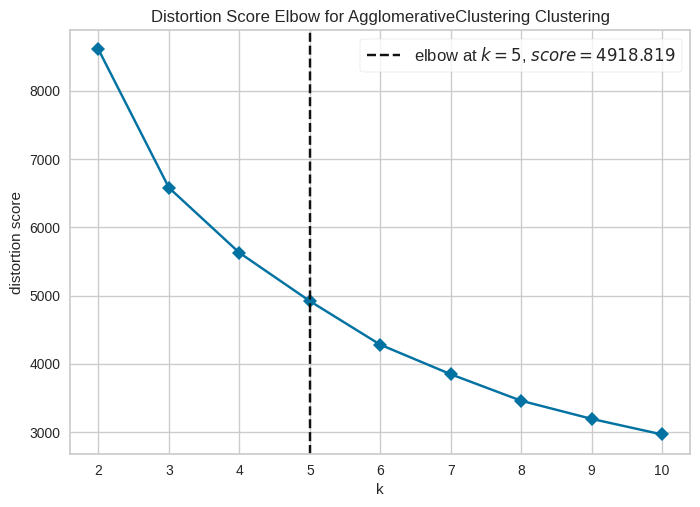

In [426]:
kelbow_visualizer(AgglomerativeClustering(), rfv_scaled_clip, k=10, timings=False);

In [428]:
# Criando lista de dicionarios

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = rfv_scaled_clip.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
#  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.250879,1.444028,1712.133717
3,0.266796,1.159741,1786.128125
4,0.199337,1.382702,1636.407623
5,0.213657,1.279656,1559.443742
6,0.226417,1.181535,1562.783575
7,0.219809,1.086081,1529.644901
8,0.226592,1.166931,1527.448838
9,0.225637,1.199311,1492.220184
10,0.222311,1.194926,1465.412796


In [429]:
hclust = AgglomerativeClustering(n_clusters=5)
hc_labels = hclust.fit_predict(rfv_scaled_clip)

In [430]:
px.scatter_3d(rfv_scaled_clip, x='Recencia', y='Frequencia', z='Valor', color=hc_labels.astype(str),template= 'plotly_dark')

# Gaussian Mixture

In [433]:
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X= rfv_scaled_clip.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
24,30002.316659,7,full
30,30271.597480,8,diag
26,30286.806835,7,diag
22,30305.914228,6,diag
16,32116.936824,5,full


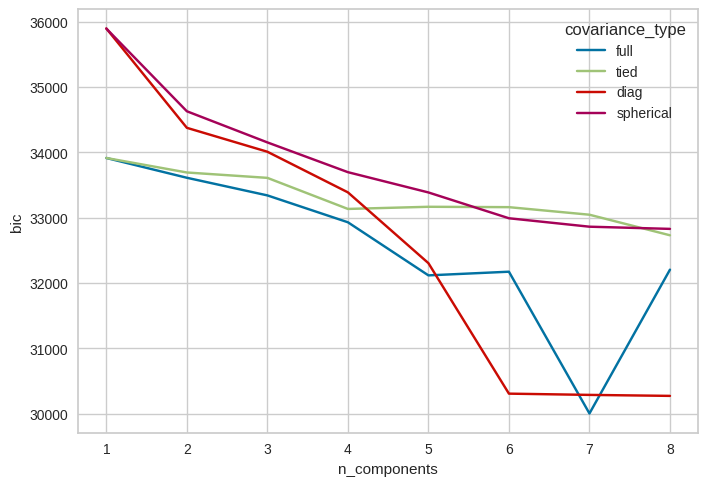

In [434]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [438]:
mclust = GaussianMixture(n_components=5, covariance_type='full')
mclust_labels = mclust.fit_predict(rfv_scaled_clip)

In [440]:
px.scatter_3d(rfv_scaled_clip, x='Recencia', y='Frequencia', z='Valor', color=mclust_labels.astype(str),template= 'plotly_dark')